<h1 style="font-size:300%; background-color:#ffe4b5; color:#4b0082; text-align:center; line-height : 60px;">
Taller 3 - Morfología Matemática</h1>

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/a/a2/Escudo_de_la_Universidad_Nacional_de_Colombia_%282016%29.svg/598px-Escudo_de_la_Universidad_Nacional_de_Colombia_%282016%29.svg.png" alt="Escudo UNAL" style="width:200px;height:250px;">

<p style="font-size:180%; text-align:center; line-height : 30px;  margin-top : 0; margin-bottom : 0; "> <br><br>Técnicas de Inteligencia Artificial - Visión de Máquina</p>
<p style="font-size:180%; text-align:center; line-height : 30px; margin-top : 0; "> Facultad de Ingeniería</p>
<p style="font-size:160%; text-align:center; line-height : 30px; margin-top : 0; "> Universidad Nacional de Colombia Sede Bogotá</p>
<p style="font-size:160%; text-align:center; line-height : 30px; margin-top : 0; "> <br>Septiembre de 2022</p>

In [1]:
%matplotlib inline
import cv2
import skimage.morphology as morph
import numpy as np
import matplotlib.pyplot as plt

<h1 style="text-align:center">Imágenes binarias</h1>
<br>
<h2>Dilatación</h2>
<br>
<p style='font-size:120%'>$A\oplus B=\{z|(\hat{B})_z \cap A \neq \emptyset\}$</p>
<br>
<img src="figs/dilation1.png">
<br>
<br>
<a href="https://docs.opencv.org/3.4/d4/d86/group__imgproc__filter.html#gac342a1bb6eabf6f55c803b09268e36dc">Structuring Element</a><br>
<a href="https://docs.opencv.org/3.4/d4/d86/group__imgproc__filter.html#ga4ff0f3318642c4f469d0e11f242f3b6c">Dilate</a>
<br>
<p>La posición del origen del SE es MUY determinante en el resultado de la dilatación de una imagen.</p>

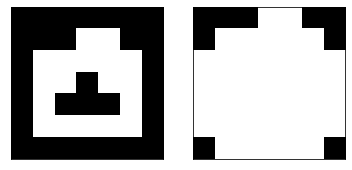

In [4]:
img = 255*np.asarray([[0,0,0,0,0,0,0],
                      [0,0,0,1,1,0,0],
                      [0,1,1,1,1,1,0],
                      [0,1,1,0,1,1,0],
                      [0,1,0,0,0,1,0],
                      [0,1,1,1,1,1,0],
                      [0,0,0,0,0,0,0]],np.uint8)

#Dilation
se = cv2.getStructuringElement(cv2.MORPH_CROSS,(3,3))
img_dil = cv2.dilate(img,se,anchor=(1,1))

#Plot
plt.subplot(121),plt.imshow(img,cmap='gray'),plt.xticks([]),plt.yticks([])
plt.subplot(122),plt.imshow(img_dil,cmap='gray'),plt.xticks([]),plt.yticks([])
plt.show()

SE1
 [[0 0 1 0 0]
 [0 0 1 0 0]
 [1 1 1 1 1]
 [0 0 1 0 0]
 [0 0 1 0 0]] 

SE2
 [[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 1 1 1 1 1 1 1 1 1 1 1 1 1 0]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [0 1 1 1 1 1 1 1 1 1 1 1 1 1 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]]


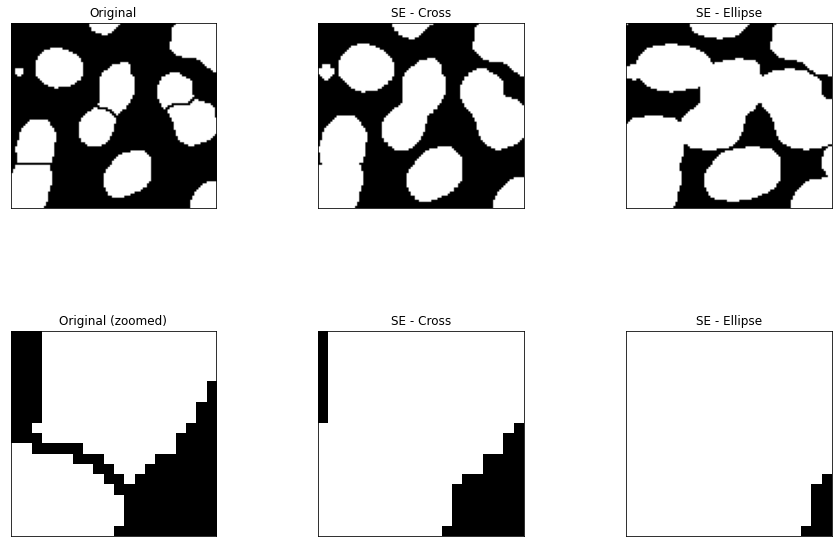

In [5]:
img = cv2.imread("figs/fmic.png",0)

#Dilation
se1 = cv2.getStructuringElement(cv2.MORPH_CROSS,(5,5))
img_dil1 = cv2.dilate(img,se1)

se2 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(15,5))
img_dil2 = cv2.dilate(img,se2,cv2.BORDER_REPLICATE)

#Plot
print('SE1\n',se1,'\n')
print('SE2\n',se2)

plt.figure(1)
plt.subplots_adjust(top=2,bottom=0.01,left=0.10,right=2,hspace=0.25,wspace=0.5)

plt.subplot(231),plt.imshow(img[90:180,80:180],cmap='gray')
plt.title('Original'),plt.xticks([]),plt.yticks([])
plt.subplot(232),plt.imshow(img_dil1[90:180,80:180],cmap='gray')
plt.title('SE - Cross'),plt.xticks([]),plt.yticks([])
plt.subplot(233),plt.imshow(img_dil2[90:180,80:180],cmap='gray')
plt.title('SE - Ellipse'),plt.xticks([]),plt.yticks([])
plt.subplot(234),plt.imshow(img[120:140,120:140],cmap='gray')
plt.title('Original (zoomed)'),plt.xticks([]),plt.yticks([])
plt.subplot(235),plt.imshow(img_dil1[120:140,120:140],cmap='gray')
plt.title('SE - Cross'),plt.xticks([]),plt.yticks([])
plt.subplot(236),plt.imshow(img_dil2[120:140,120:140],cmap='gray')
plt.title('SE - Ellipse'),plt.xticks([]),plt.yticks([])
plt.show()

En la dilatación, el SE es <b>reflejado</b> (rotado 180°) antes de aplicarlo sobre cada píxel de la imagen.

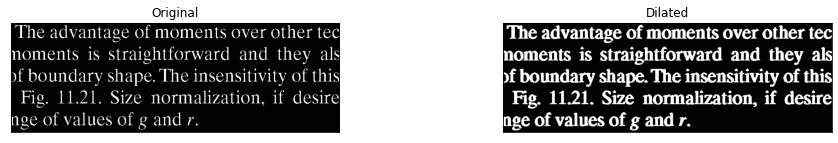

In [6]:
img = cv2.imread('figs/dilationt1.png',0)
ret,img_th = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)

#Dilation
se = np.asarray([[1,0,1],[0,1,0]],np.uint8)
img_dil = cv2.dilate(img_th,se,iterations=2)

#Plot
plt.figure(1)
plt.subplots_adjust(top=2,bottom=0.01,left=0.10,right=2,hspace=0.25,wspace=0.5)

plt.subplot(121),plt.imshow(img_th,cmap='gray')
plt.title('Original'),plt.xticks([]),plt.yticks([])
plt.subplot(122),plt.imshow(img_dil,cmap='gray')
plt.title('Dilated'),plt.xticks([]),plt.yticks([])
plt.show()

<h2>Erosión</h2>
<br>
<p style='font-size:120%'>$A\ominus B=\{z|(B)_z \cap A^c = \emptyset\}$</p>
<br>
<img src="figs/erosion1.png">
<br>
<br>
<a href="https://docs.opencv.org/3.4/d4/d86/group__imgproc__filter.html#gaeb1e0c1033e3f6b891a25d0511362aeb">Erode</a>

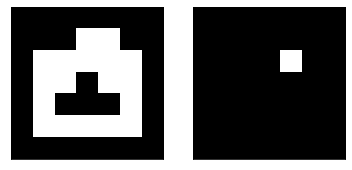

In [7]:
img = 255*np.asarray([[0,0,0,0,0,0,0],
                      [0,0,0,1,1,0,0],
                      [0,1,1,1,1,1,0],
                      [0,1,1,0,1,1,0],
                      [0,1,0,0,0,1,0],
                      [0,1,1,1,1,1,0],
                      [0,0,0,0,0,0,0]],np.uint8)

#Erosion
se = cv2.getStructuringElement(cv2.MORPH_CROSS,(3,3))
img_er = cv2.erode(img,se)

#Plot
plt.subplot(121),plt.imshow(img,cmap='gray'),plt.xticks([]),plt.yticks([])
plt.subplot(122),plt.imshow(img_er,cmap='gray'),plt.xticks([]),plt.yticks([])
plt.show()

SE1
 [[0 0 1 0 0]
 [0 0 1 0 0]
 [1 1 1 1 1]
 [0 0 1 0 0]
 [0 0 1 0 0]] 

SE2
 [[0 0 1 0 0]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [0 0 1 0 0]]


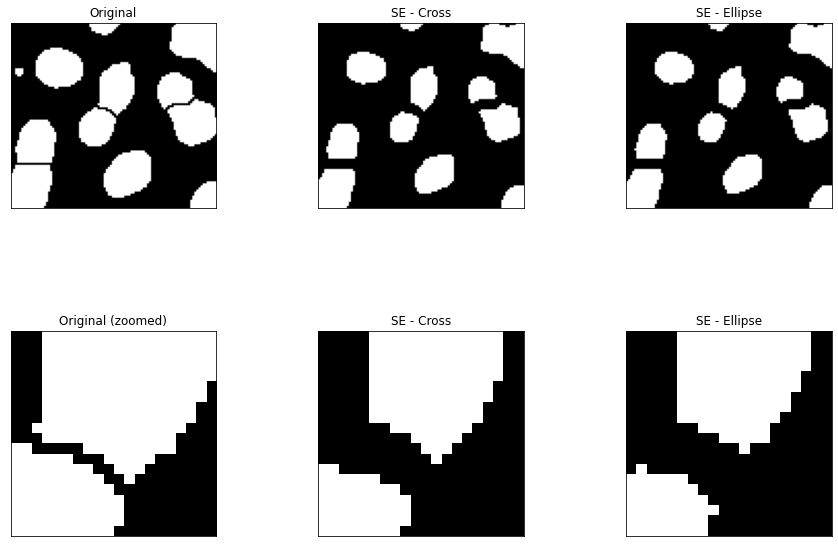

In [8]:
img = cv2.imread("figs/fmic.png",0)

#Erosion
se1 = cv2.getStructuringElement(cv2.MORPH_CROSS,(5,5))
img_er1 = cv2.erode(img,se1)

se2 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))
img_er2 = cv2.erode(img,se2,cv2.BORDER_REPLICATE)

#Plot
print('SE1\n',se1,'\n')
print('SE2\n',se2)

plt.figure(1)
plt.subplots_adjust(top=2,bottom=0.01,left=0.10,right=2,hspace=0.25,wspace=0.5)

plt.subplot(231),plt.imshow(img[90:180,80:180],cmap='gray')
plt.title('Original'),plt.xticks([]),plt.yticks([])
plt.subplot(232),plt.imshow(img_er1[90:180,80:180],cmap='gray')
plt.title('SE - Cross'),plt.xticks([]),plt.yticks([])
plt.subplot(233),plt.imshow(img_er2[90:180,80:180],cmap='gray')
plt.title('SE - Ellipse'),plt.xticks([]),plt.yticks([])
plt.subplot(234),plt.imshow(img[120:140,120:140],cmap='gray')
plt.title('Original (zoomed)'),plt.xticks([]),plt.yticks([])
plt.subplot(235),plt.imshow(img_er1[120:140,120:140],cmap='gray')
plt.title('SE - Cross'),plt.xticks([]),plt.yticks([])
plt.subplot(236),plt.imshow(img_er2[120:140,120:140],cmap='gray')
plt.title('SE - Ellipse'),plt.xticks([]),plt.yticks([])
plt.show()

<h2>Apertura</h2>
<p style='font-size:120%'>$A\circ B=(A\ominus B)\oplus B$</p>
<br>
<a href="https://docs.opencv.org/4.x/d4/d86/group__imgproc__filter.html#ga67493776e3ad1a3df63883829375201f">Apertura</a>

[[1 1 1]
 [1 1 1]]


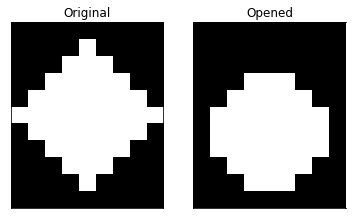

In [11]:
img = np.asarray([[0,0,0,0,0,0,0,0,0],
                  [0,0,0,0,1,0,0,0,0],
                  [0,0,0,1,1,1,0,0,0],
                  [0,0,1,1,1,1,1,0,0],
                  [0,1,1,1,1,1,1,1,0],
                  [1,1,1,1,1,1,1,1,1],
                  [0,1,1,1,1,1,1,1,0],
                  [0,0,1,1,1,1,1,0,0],
                  [0,0,0,1,1,1,0,0,0],
                  [0,0,0,0,1,0,0,0,0],
                  [0,0,0,0,0,0,0,0,0]],np.uint8)

#Opening
se = np.asarray([[1,1,1],[1,1,1]],np.uint8)
img_op = cv2.morphologyEx(img,cv2.MORPH_OPEN,se,anchor=(1,1))

#Plot
print(se)

plt.subplot(121),plt.title('Original'),plt.imshow(img,cmap='gray'),plt.xticks([]),plt.yticks([])
plt.subplot(122),plt.title('Opened'),plt.imshow(img_op,cmap='gray'),plt.xticks([]),plt.yticks([])
plt.show()

<h2>Cierre</h2>
<p style='font-size:120%'>$A\bullet B = (A\oplus B)\ominus B$</p>
<p>Esta operación se realiza también mediante la función <i>cv2.morphologyEx</i>, pero utilizando <i>cv2.MORPH_CLOSE</i> como argumento de operación.</p>

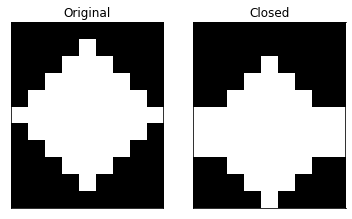

In [12]:
#Closing
se = np.asarray([[1,1,1],[1,1,1]],np.uint8)
img_cl = cv2.morphologyEx(img,cv2.MORPH_CLOSE,se)

#Plot
plt.subplot(121),plt.title('Original'),plt.imshow(img,cmap='gray'),plt.xticks([]),plt.yticks([])
plt.subplot(122),plt.title('Closed'),plt.imshow(img_cl,cmap='gray'),plt.xticks([]),plt.yticks([])
plt.show()

<h2>Transformada Hit-or-Miss</h2>

<p style='font-size:120%'>$A\circledast B=(A\ominus D)\cap \left[ A^c\ominus (W-D)\right]$</p>

<p>Otras expresiones asumen que $B_1 =D$ y $B_2 =W-D$. $B_1$ representa los píxeles que conforman al objeto que se quiere buscar, mientras que $B_2$ representa el fondo que rodea a dicho objeto.</p>
<p style='font-size:120%'>$A\circledast B=(A\ominus B_1)\cap \left[ A^c\ominus B_2)\right]$</p>
<br>
<img src='figs/hom.png' style='width:715px;height:1161px'>
<p style='font-size:80%'><i>Tomado de: Gonzalez, R.; Woods, R. Digital Image Processing. The Hit-or-Miss Transformation. 3ed. Pearson Prentice Hall.</i></p>
<p>Para implementar esta transformación, se utiliza <i>cv2.MORPH_HITMISS</i> como argumento de operación en la función <i>cv2.morphologyEx</i>.</p>

Coincidences:  28


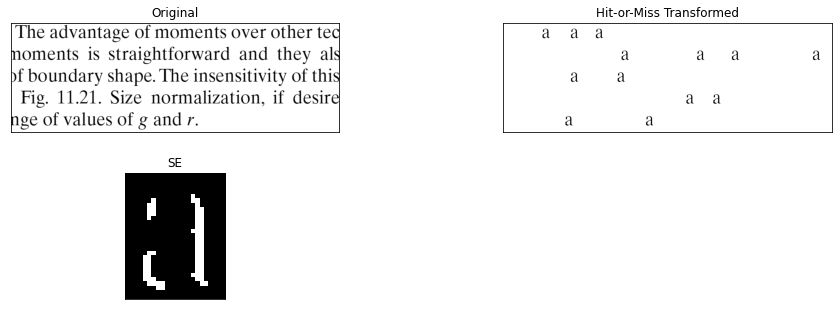

In [14]:
img = cv2.imread('figs/dilationt1.png',0)
ret,img_th = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)

#Hit-or-Miss
sel = cv2.imread('figs/sehom2.png',0)

if (sel.shape[0]%2) == 0:
    sel = sel[:sel.shape[0]-1,:]
if (sel.shape[1]%2) == 0:
    sel = sel[:,:sel.shape[1]-1] #Assigns odd dimensions to SE

ret,sel = cv2.threshold(sel,127,255,cv2.THRESH_BINARY_INV)
se = sel//255                    #SE must contain 0s and 1s only

se_aux = np.asarray([[1,1],[1,1]])
se = cv2.erode(se,se_aux)        #SE is eroded to allow a more flexible match

img_hom = cv2.morphologyEx(img_th,cv2.MORPH_HITMISS,se)

img_res = np.zeros(img.shape)    #Array to store processed image
h = se.shape[0]//2               #Half the height of SE
w = se.shape[1]//2               #Half the width of SE

coord=[]
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        if img_hom[i,j] == 255:
            coord.append((i,j))
            if j>=w: 
                img_res[i-h:i+h+1,j-w:j+w+1] = sel

img_res = 255-img_res
 
#Plot

print('Coincidences: ',len(coord))
plt.figure(1)
plt.subplots_adjust(top=1,bottom=0.01,left=0.10,right=2,hspace=0.25,wspace=0.5)

plt.subplot(221),plt.title('Original'),plt.imshow(img,cmap='gray'),plt.xticks([]),plt.yticks([])
plt.subplot(222),plt.title('Hit-or-Miss Transformed'),plt.imshow(img_res,cmap='gray'),plt.xticks([]),plt.yticks([])
plt.subplot(223),plt.title('SE'),plt.imshow(se,cmap='gray'),plt.xticks([]),plt.yticks([])
plt.show()

<h2>Extracción de fronteras</h2>
<p style='font-size:120%'>$\beta (A)=A-(A\ominus B)$</p>
<p></p>

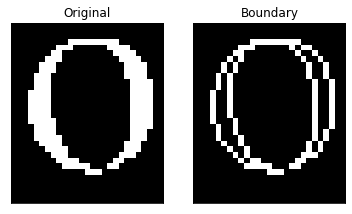

In [15]:
img = cv2.imread('figs/sehom.png',0)
ret,img_th = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)

#Boundary extraction
se = cv2.getStructuringElement(cv2.MORPH_CROSS,(3,3))
bound = img_th - cv2.erode(img_th,se)

#Plot
plt.figure(1)

plt.subplot(121),plt.title('Original'),plt.imshow(img_th,cmap='gray'),plt.xticks([]),plt.yticks([])
plt.subplot(122),plt.title('Boundary'),plt.imshow(bound,cmap='gray'),plt.xticks([]),plt.yticks([])
plt.show()

<h2>Llenado de regiones</h2>
<p style='font-size:120%'>$X_k =(X_{k-1}\oplus B)\cap A^c,~~k=1,2,3,...$</p>
<p>Para que esta técnica funcione,<b>TODA región que se quiere rellenar debe tener al menos 1 píxel semilla en la matriz X inicial</b>. Dado que es de tipo recursivo, el proceso se detiene cuando $X_k = X_{k-1}$.</p>

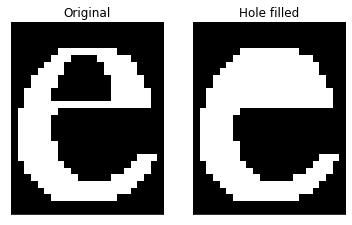

In [16]:
img = cv2.imread('figs/sehom4.png',0)
ret,img_th = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)

#Boundary closing through dilation
se = np.asarray([[1,1,1]],np.uint8)
img = cv2.dilate(img_th,se)

#Hole filling
Ac = (255 - img)//255

X = np.zeros(img.shape)
X[6,10] = 1 #This pixel was identified manually as member of a hole

B = cv2.getStructuringElement(cv2.MORPH_CROSS,(3,3))

X1 = cv2.dilate(X,B)*Ac
while(np.sum(X1) != np.sum(X)):
    X = X1
    X1 = cv2.dilate(X,B)*Ac

#Plot
plt.figure(1)
plt.subplot(121),plt.title('Original'),plt.imshow(img,cmap='gray'),plt.xticks([]),plt.yticks([])
plt.subplot(122),plt.title('Hole filled'),plt.imshow(X1*255+img,cmap='gray'),plt.xticks([]),plt.yticks([])
plt.show()
# print(img[6,10])

<h2>Adelgazamiento</h2>
<p style='font-size:120%'>$A\otimes B = A-(A\circledast B)$</p><br>
<a href='https://scikit-image.org/docs/dev/api/skimage.morphology.html#skimage.morphology.thin'>Adelgazamiento con skimage</a>
<br>
<a href='https://scikit-image.org/docs/dev/api/skimage.morphology.html#skimage.morphology.thin'>Esqueletonización con skimage para imágenes 2D</a>

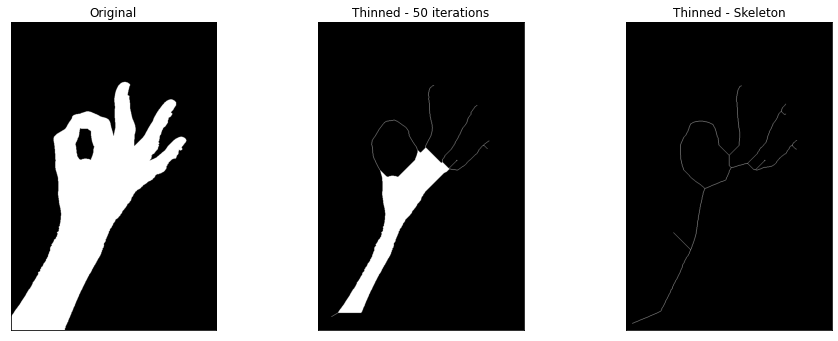

In [17]:
img = cv2.imread('figs/ok.jpg',0)
ret,img_th = cv2.threshold(img,220,255,cv2.THRESH_BINARY_INV)

#Dilation to ensure connectivity
se = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(7,7))
img_th = cv2.dilate(img_th,se)

#Thinning skimage.morphology
img_thin = morph.thin(img_th,50)
# img_thin2 = morph.thin(img_th)
img_thin2 = morph.skeletonize(img_th//255)

#Plot
plt.figure(1)
plt.subplots_adjust(top=2,bottom=0.01,left=0.10,right=2,hspace=0.25,wspace=0.5)

plt.subplot(131),plt.title('Original'),plt.imshow(img_th,cmap='gray'),plt.xticks([]),plt.yticks([])
plt.subplot(132),plt.title('Thinned - 50 iterations'),plt.imshow(img_thin,cmap='gray'),plt.xticks([]),plt.yticks([])
plt.subplot(133),plt.title('Thinned - Skeleton'),plt.imshow(img_thin2,cmap='gray'),plt.xticks([]),plt.yticks([])
plt.show()

<h1 style='text-align:center'>Imágenes en escala de grises</h1>

<p>
    $f(x,y) \rightarrow$ Imagen en escala de grises<br>
    $b(x,y) \rightarrow$ Elemento estructurante (SE)<br>
    <img src='figs/kergray.png' width='350' height='250'>
</p>
<h2>Dilatación</h2>
<br>
<p style='text-align:justify'>
    <p style='font-size:120%'>$[f\oplus b](x,y)=\max_{(s,t)\in b}\{f(x-s,y-t)\}$</p>
    <br>
    <img src='figs/dilgray.png' width='900' height='800'>
</p>

<h2>Erosión</h2>
<p style='font-size:120%'>$[f\ominus b](x,y)=\min_{(s,t)\in b}\{f(x+s,y+t)\}$</p>

<h2>Apertura y Cierre</h2>
<p>Se definen de la misma manera.</p>

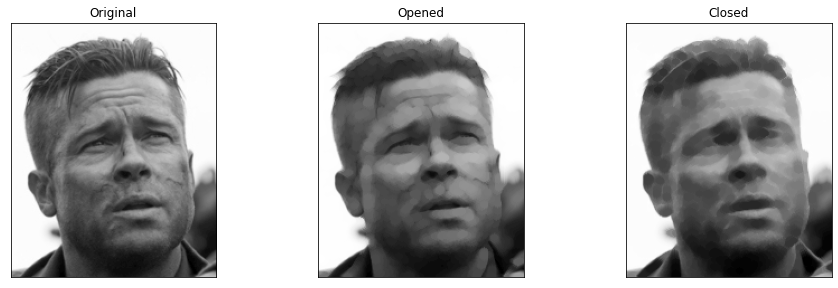

In [18]:
img = cv2.imread('figs/fury.png',0)

#Opening
se = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(7,7))
img_o = cv2.morphologyEx(img,cv2.MORPH_OPEN,se)
img_c = cv2.morphologyEx(img,cv2.MORPH_CLOSE,se)

#Plot
plt.figure(1)
plt.subplots_adjust(top=2,bottom=0.01,left=0.10,right=2,hspace=0.25,wspace=0.5)

plt.subplot(131),plt.title('Original'),plt.imshow(img,cmap='gray'),plt.xticks([]),plt.yticks([])
plt.subplot(132),plt.title('Opened'),plt.imshow(img_o,cmap='gray'),plt.xticks([]),plt.yticks([])
plt.subplot(133),plt.title('Closed'),plt.imshow(img_c,cmap='gray'),plt.xticks([]),plt.yticks([])
plt.show()

<h2>Gradiente morfológico</h2>
<p style='font-size:120%'>
    $g=(f\oplus b)-(f\ominus b)$<br>
</p>
<p style='text-align:justify'>
    Esta operación funciona como un filtro de detección de bordes, al realzar las regiones que, entre la imagen dilatada y la erosionada, exhiben mayores diferencias de intensidad.
</p>

<h2>Transformación Top-Hat (White Top-Hat)</h2>
<p style='font-size:120%'>$T_{hat}(f)=f-(f\circ b)$</p>
<p style='text-align:justify'>Se utiliza para escenarios como los siguientes:<br>
a) Remoción de objetos claros rodeados por un fondo oscuro.<br>
b) Corrección de efectos generados por una iluminación no uniforme en la imagen.<br><br>
    Para su implementación se usa el argumento <i>cv2.MORPH_TOPHAT</i> en la función <i>cv2.morphologyEx</i>.</p>

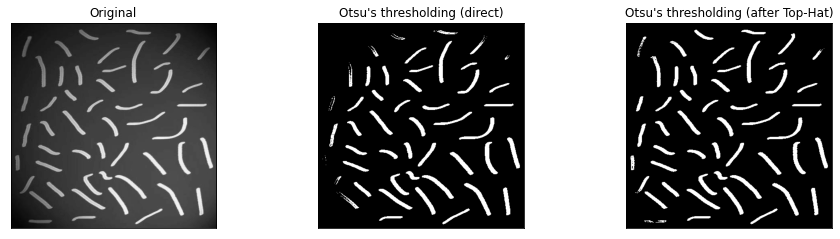

In [19]:
img = cv2.imread('figs/bacteria.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

ret,img_um = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

#Top-Hat
se = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(41,41))
img_that = cv2.morphologyEx(img,cv2.MORPH_TOPHAT,se)

ret,img_um2 = cv2.threshold(img_that,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

#Plot
plt.figure(1)
plt.subplots_adjust(top=2,bottom=0.01,left=0.10,right=2,hspace=0.25,wspace=0.5)

plt.subplot(131),plt.title('Original'),plt.imshow(img,cmap='gray'),plt.xticks([]),plt.yticks([])
plt.subplot(132),plt.title('Otsu\'s thresholding (direct)'),plt.imshow(img_um,cmap='gray'),plt.xticks([]),plt.yticks([])
plt.subplot(133),plt.title('Otsu\'s thresholding (after Top-Hat)'),plt.imshow(img_um2,cmap='gray'),plt.xticks([]),plt.yticks([])

plt.show()

<h2>Transformación Bottom-Hat (Black Top-Hat)</h2>
<p style='font-size:120%'>$B_{hat}(f)=(f\bullet b)-f$</p>
<p style='text-align:justify'>Se utiliza para escenarios como los siguientes:<br>
a) Remoción de objetos oscuros rodeados por un fondo claro.<br>
b) Corrección de efectos generados por una iluminación no uniforme en la imagen.<br><br>
    Para su implementación se usa el argumento <i>cv2.MORPH_BLACKHAT</i> en la función <i>cv2.morphologyEx</i>.</p>

<h1 style='text-align:center'>Ejercicios</h1>
<br>
<p style='text-align:justified'><b>1.</b> Aplique la operación de dilatación sobre la imagen siguiente con distintos elementos estructurantes (SE) y observe las diferencias en los resultados.

In [ ]:
img = cv2.imread('figs/dilationt1.png',0)


<p style='text-align:justified'><b>2.</b> Aplique la operación de erosión sobre la imagen anterior (sin dilatar). ¿Qué observa?</p>

<p style='text-align:justified'><b>3.</b> Tome una imagen de su elección y umbralícela para obtenerla a blanco y negro. Luego:<br><br>
a) Aplique una dilatación y luego una erosión sobre ella, y verifique si la erosión deshace los cambios realizados por la dilatación.</p>

b) Dilátela usando el mismo SE del inciso anterior, y luego halle el complemento del resultado que obtenga (lo que era blanco, ahora será negro y viceversa).<br>

<p>c) Compare el resultado del inciso b) con el obtenido al aplicar la operación $A^c \ominus \hat{B}$, donde $A$ es su imagen en formato blanco y negro (use el mismo SE del inciso a). Esto se conoce como el <b> principio de dualidad</b>: La dilatación y la erosión son complementarias, ofrecen dos formas distintas de llegar a un mismo resultado.</p>

<p style='text-align:justify'><b>4.</b> Aplique la operación de apertura sobre la siguiente imagen. Pruebe con distintos tamaños de SE y observe qué pasa con el ruido.</p>

In [44]:
img = cv2.imread('figs/sp2.png',0)


<p style='text-align:justify'><b>5.</b> Ahora aplique la operación de cierre sobre la imagen siguiente, y observe de nuevo los cambios en el ruido.</p>

In [43]:
img = cv2.imread('figs/sp.png',0)


<p style='text-align:justify'><b>6.</b> La operación $(A \circ B)\bullet B$ es útil también para el suavizado de contornos. Aplíquela sobre una imagen en escala de grises de su elección y compare el resultado con otras técnicas de suavizado.</p>

<p style='text-align:justify'><b>7.</b> Ejecute el script revisado arriba para la transformación Hit-or-Miss, pero esta vez utilice como SE la letra <i>t</i> (la ruta es "figs/sehom3.png"). ¿Se reconocen correctamente todas las coincidencias? En caso de que no, ¿Qué se puede hacer para corregir esto? </p>

<p style='text-align:justify'><b>8.</b> Aplique la operación de gradiente morfológico sobre una imagen en escala de grises y evalúe qué tan limpios son los contornos resultantes. </p>